In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"derizkyan","key":"f6c4db6d4479ada116214b0b8b3bb010"}'> ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:08<00:00, 33.4MB/s]
100% 225M/225M [00:08<00:00, 28.4MB/s]


In [2]:
import zipfile

path_to_zip_file = "/content/flowers-recognition.zip"
directory_to_extract_to = "/content/flowers"  # Ganti dengan path folder tujuan ekstraksi

with zipfile.ZipFile(path_to_zip_file  ,'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)


In [3]:
import os
base_dir = '/content/flowers/flowers'
print(os.listdir(base_dir))

['tulip', 'sunflower', 'dandelion', 'daisy', 'rose']


In [4]:

# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


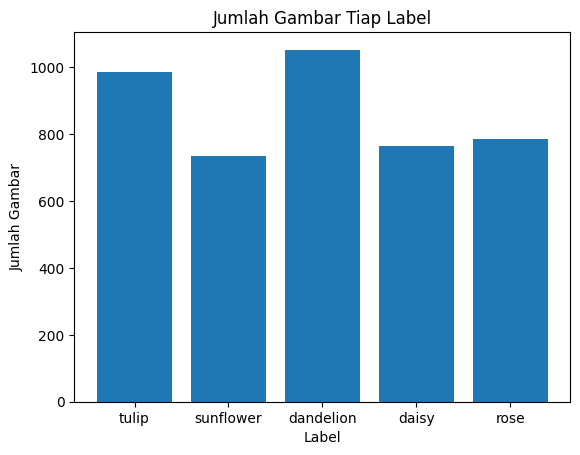

In [5]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

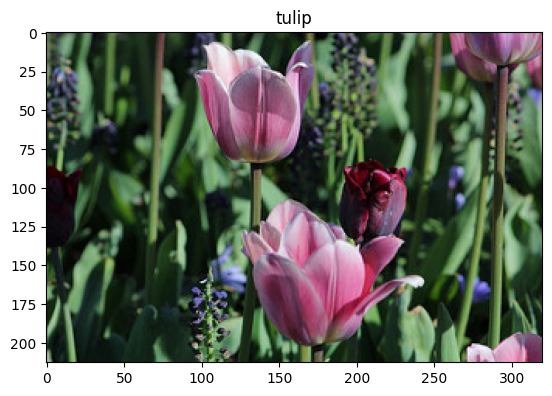

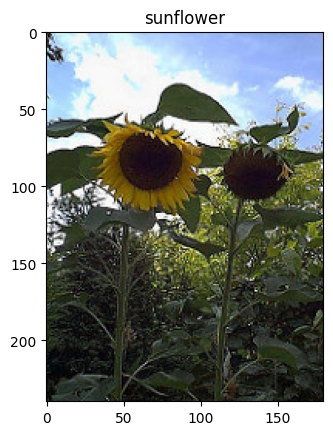

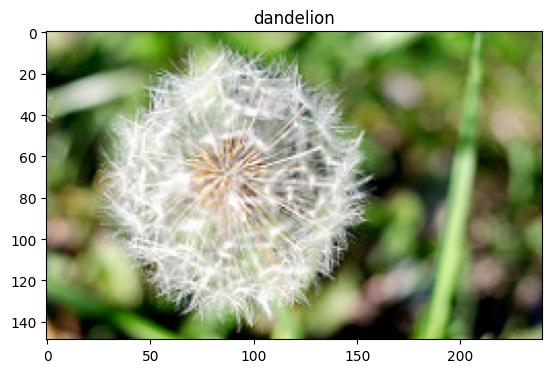

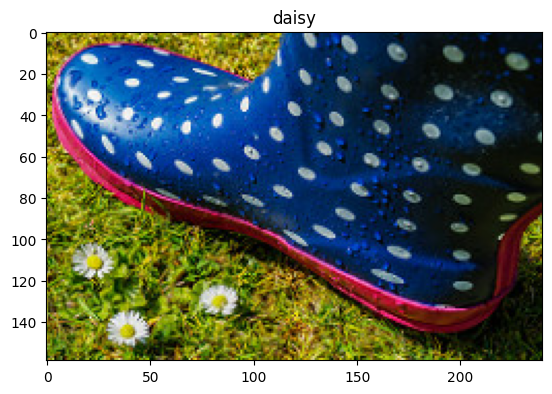

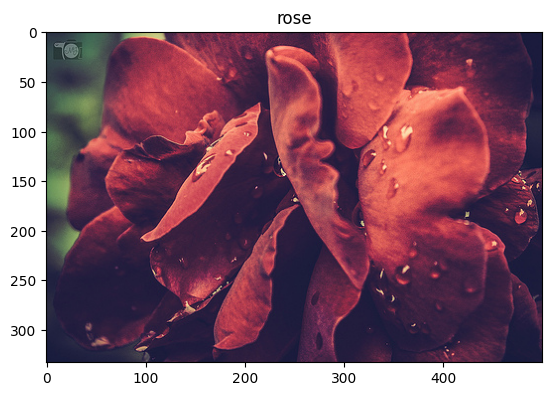

In [6]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()


In [7]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999


In [8]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [9]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [10]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)


In [11]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [12]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 31s 159ms/step - loss: 1.2979 - accuracy: 0.4345 - val_loss: 1.2271 - val_accuracy: 0.5198
Epoch 2/20
109/109 [==============================] - 17s 159ms/step - loss: 1.0414 - accuracy: 0.5832 - val_loss: 1.0495 - val_accuracy: 0.5849
Epoch 3/20
109/109 [==============================] - 16s 145ms/step - loss: 0.9679 - accuracy: 0.6248 - val_loss: 0.9823 - val_accuracy: 0.6151
Epoch 4/20
109/109 [==============================] - 17s 153ms/step - loss: 0.8991 - accuracy: 0.6459 - val_loss: 0.9578 - val_accuracy: 0.6093
Epoch 5/20
109/109 [==============================] - 16s 148ms/step - loss: 0.8602 - accuracy: 0.6676 - val_loss: 0.9657 - val_accuracy: 0.6140
Epoch 6/20
109/109 [==============================] - 16s 148ms/step - loss: 0.7982 - accuracy: 0.6957 - val_loss: 1.1031 - val_accuracy: 0.6012
Epoch 7/20
109/109 [==============================] - 18s 165ms/step - loss: 0.8674 - accuracy: 0.6665 - val_loss: 0.8206 - val_ac

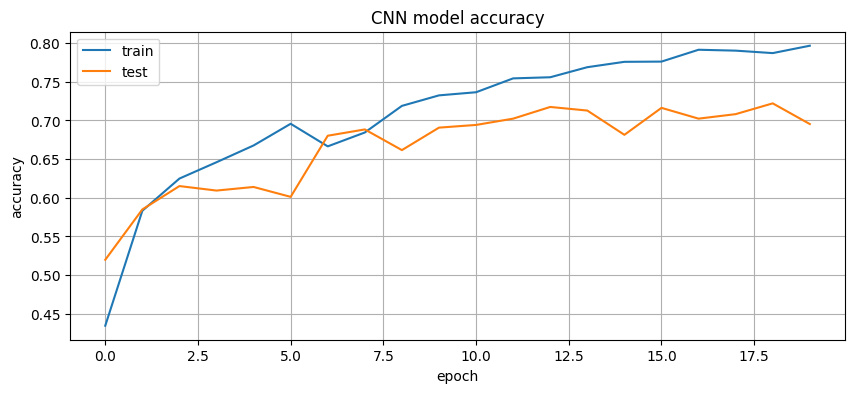

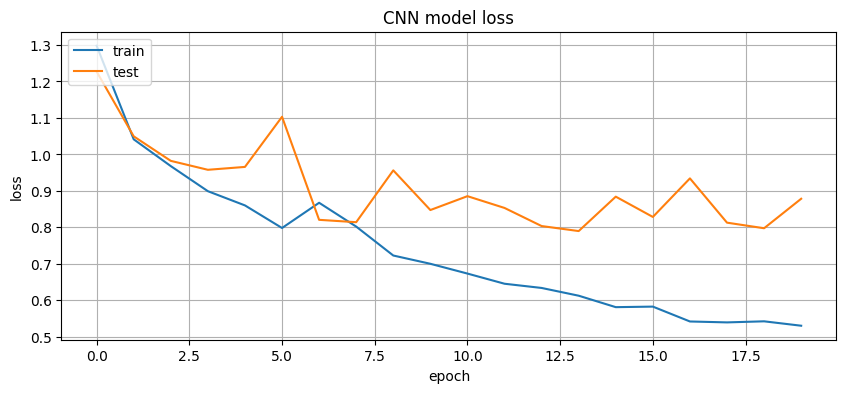

In [13]:

# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

58889256/58889256 [==============================] - 3s 0us/step


In [15]:

# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
109/109 [==============================] - 33s 251ms/step - loss: 1.0683 - accuracy: 0.5837 - val_loss: 0.7576 - val_accuracy: 0.7163
Epoch 2/10
109/109 [==============================] - 20s 186ms/step - loss: 0.7875 - accuracy: 0.7081 - val_loss: 0.6200 - val_accuracy: 0.7605
Epoch 3/10
109/109 [==============================] - 20s 186ms/step - loss: 0.7082 - accuracy: 0.7371 - val_loss: 0.6603 - val_accuracy: 0.7663
Epoch 4/10
109/109 [==============================] - 20s 183ms/step - loss: 0.6922 - accuracy: 0.7501 - val_loss: 0.5852 - val_accuracy: 0.7930
Epoch 5/10
109/109 [==============================] - 20s 184ms/step - loss: 0.6135 - accuracy: 0.7741 - val_loss: 0.5738 - val_accuracy: 0.8093
Epoch 6/10
109/109 [==============================] - 19s 178ms/step - loss: 0.6245 - accuracy: 0.7657 - val_loss: 0.5548 - val_accuracy: 0.8000
Epoch 7/10
109/109 [==============================] - 20s 184ms/step - loss: 0.6467 - accuracy: 0.7628 - val_loss: 0.5666 - val_ac

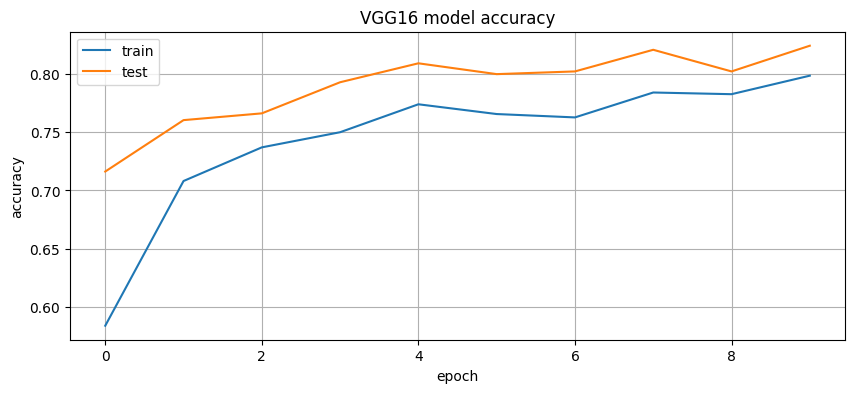

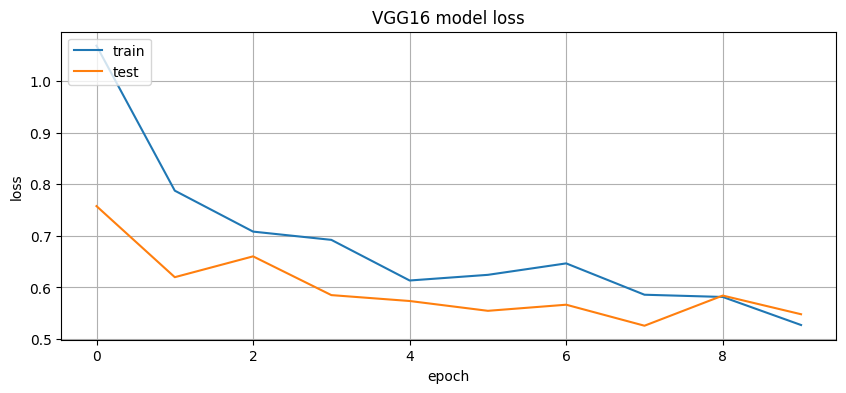

In [16]:

# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [17]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

94765736/94765736 [==============================] - 4s 0us/step


In [18]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
109/109 [==============================] - 26s 184ms/step - loss: 1.7807 - accuracy: 0.2499 - val_loss: 1.4959 - val_accuracy: 0.3872
Epoch 2/10
109/109 [==============================] - 19s 171ms/step - loss: 1.5423 - accuracy: 0.3231 - val_loss: 1.5187 - val_accuracy: 0.2942
Epoch 3/10
109/109 [==============================] - 18s 165ms/step - loss: 1.5317 - accuracy: 0.3202 - val_loss: 1.5032 - val_accuracy: 0.3407
Epoch 4/10
109/109 [==============================] - 17s 159ms/step - loss: 1.5110 - accuracy: 0.3341 - val_loss: 1.4811 - val_accuracy: 0.3674
Epoch 5/10
109/109 [==============================] - 17s 159ms/step - loss: 1.4866 - accuracy: 0.3518 - val_loss: 1.4603 - val_accuracy: 0.4163
Epoch 6/10
109/109 [==============================] - 17s 159ms/step - loss: 1.4832 - accuracy: 0.3630 - val_loss: 1.4054 - val_accuracy: 0.4256
Epoch 7/10
109/109 [==============================] - 20s 179ms/step - loss: 1.4507 - accuracy: 0.3850 - val_loss: 1.5782 - val_ac

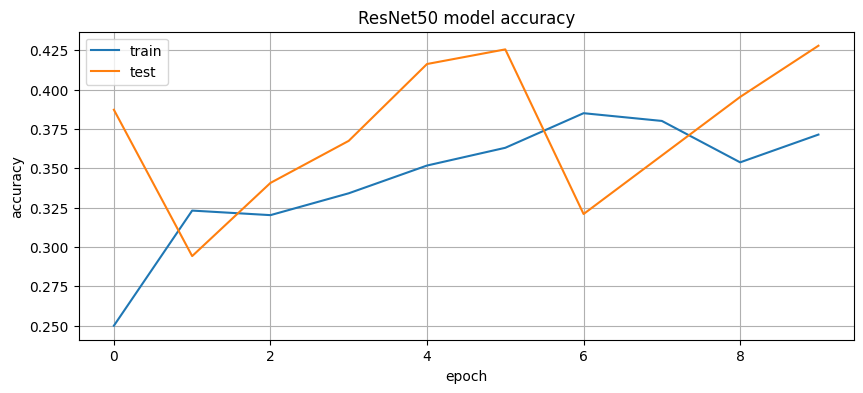

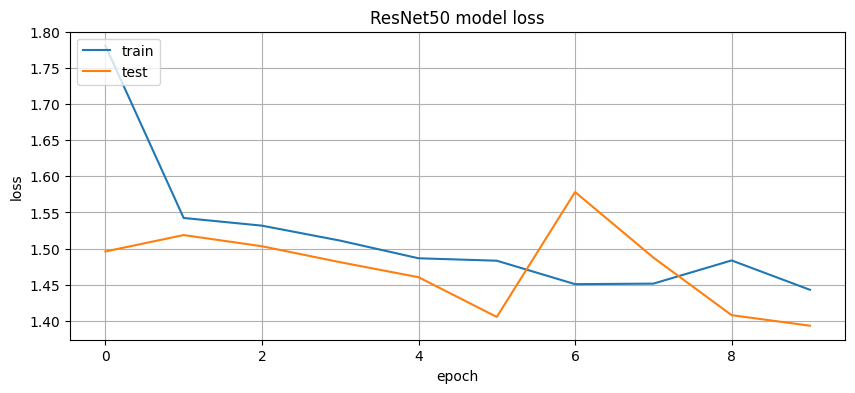

In [19]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [20]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 3s 0us/step


In [21]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [22]:

# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 43s 257ms/step - loss: 0.8960 - accuracy: 0.6665 - val_loss: 0.4420 - val_accuracy: 0.8302
Epoch 2/20
109/109 [==============================] - 21s 196ms/step - loss: 0.5133 - accuracy: 0.8117 - val_loss: 0.4542 - val_accuracy: 0.8256
Epoch 3/20
109/109 [==============================] - 19s 174ms/step - loss: 0.4479 - accuracy: 0.8383 - val_loss: 0.4151 - val_accuracy: 0.8605
Epoch 4/20
109/109 [==============================] - 21s 193ms/step - loss: 0.3880 - accuracy: 0.8649 - val_loss: 0.4572 - val_accuracy: 0.8419
Epoch 5/20
109/109 [==============================] - 19s 176ms/step - loss: 0.3796 - accuracy: 0.8603 - val_loss: 0.4459 - val_accuracy: 0.8547
Epoch 6/20
109/109 [==============================] - 21s 188ms/step - loss: 0.3532 - accuracy: 0.8666 - val_loss: 0.3430 - val_accuracy: 0.8779
Epoch 7/20
109/109 [==============================] - 19s 177ms/step - loss: 0.3337 - accuracy: 0.8753 - val_loss: 0.3934 - val_ac

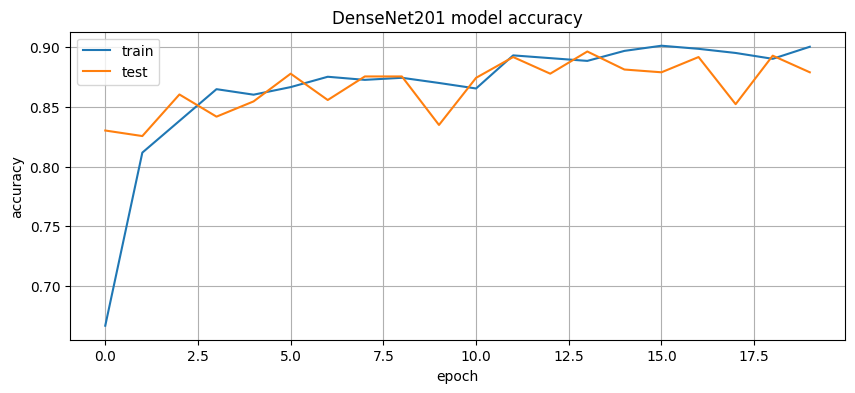

In [23]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

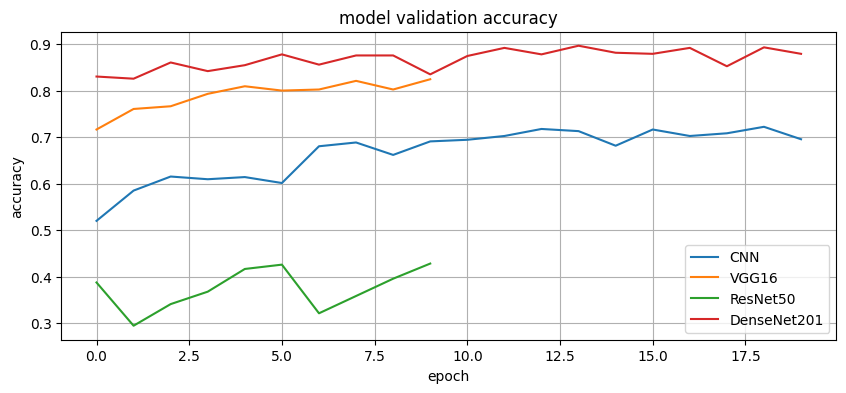

In [24]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

In [25]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Saving 33184832190_e5411d91a4_n.jpg to 33184832190_e5411d91a4_n.jpg
1/1 [==============================] - 0s 183ms/step
33184832190_e5411d91a4_n.jpg
rose


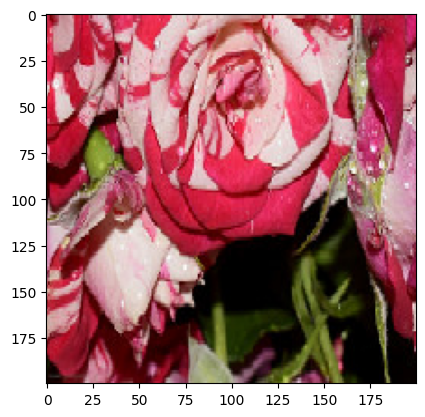

In [28]:
# Menguji coba model
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline


#file upload, kode di bawah in hanya bisa dijalankan di google colab dengan mengimport from google.colab import files. Silahkan kalian ganti kodingannya agar bisa upload di jupyter notebook masing-masing
#atau kalian langsung import file gambarnya langsung
uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = vgg_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')